<hr><font color="green"><h1>RandomForest_ExtraTrees_Regression</h1></font>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
concrete = pd.read_csv('datasets/concrete_data.csv')

concrete.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
X = concrete.drop('csMPa', axis=1)

Y = concrete['csMPa']

In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

### RandomForestRegressor
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [5]:
from sklearn.ensemble import RandomForestRegressor

In [6]:
rnd_reg = RandomForestRegressor(n_estimators=600, max_leaf_nodes=12, n_jobs=-1)

rnd_reg.fit(x_train, y_train)

RandomForestRegressor(max_leaf_nodes=12, n_estimators=600, n_jobs=-1)

In [7]:
y_pred = rnd_reg.predict(x_test)

In [8]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.7570412983035406

In [9]:
important_features = pd.Series(rnd_reg.feature_importances_, index=X.columns).\
                        sort_values(ascending=False)

important_features

age                 0.400924
cement              0.378743
water               0.076542
superplasticizer    0.063508
slag                0.060808
fineaggregate       0.011599
flyash              0.004407
coarseaggregate     0.003468
dtype: float64

#### BaggingRegressor + DecisionTreeRegressor(with splitter='random') = RandomForestRegressor

In [10]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

In [11]:
bag_reg = BaggingRegressor(DecisionTreeRegressor(splitter='random', max_leaf_nodes=12), 
                                                 n_estimators=600,
                                                 bootstrap=True,
                                                 max_samples=1.0,
                                                 n_jobs=-1)
bag_reg.fit(x_train, y_train)

BaggingRegressor(estimator=DecisionTreeRegressor(max_leaf_nodes=12,
                                                 splitter='random'),
                 n_estimators=600, n_jobs=-1)

In [12]:
y_pred = bag_reg.predict(x_test)

r2_score(y_test, y_pred)

0.729409696507105

### ExtraTreesRegressor
https://scikit-learn.org/stable/modules/generated/sklearn.tree.ExtraTreeRegressor.html     
Extra-Tree Regressor is growing tree even more random by using random thresholds for each features rather than searching for best possible thresholds (like the regular decision tree).

In [13]:
from sklearn.ensemble import ExtraTreesRegressor 

In [14]:
extra_reg = ExtraTreesRegressor(n_estimators=600, max_leaf_nodes=12, n_jobs=-1)

extra_reg.fit(x_train, y_train)

ExtraTreesRegressor(max_leaf_nodes=12, n_estimators=600, n_jobs=-1)

In [15]:
y_pred = extra_reg.predict(x_test)

r2_score(y_test, y_pred)

0.7238327190056997

In [16]:
important_features = pd.Series(extra_reg.feature_importances_, index=X.columns).\
                        sort_values(ascending=False)

important_features

age                 0.384541
cement              0.347286
water               0.087322
superplasticizer    0.086993
slag                0.050645
flyash              0.020435
fineaggregate       0.016240
coarseaggregate     0.006537
dtype: float64

<hr><font color="green"><h1>RandomForest_ExtraTrees_Classification</h1></font>

In [17]:
import pandas as pd

In [18]:
bank_data = pd.read_csv('datasets/bank_data_processed.csv')

bank_data.head()

,Age,Income,Family,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,34,180,1,3,0,0,0,0,0
1,38,130,4,3,134,0,0,0,0
2,46,193,2,3,0,0,0,0,0
3,38,119,1,2,0,0,1,1,1
4,42,141,3,3,0,1,1,1,0


In [19]:
X = bank_data.drop('CreditCard', axis=1)

Y = bank_data['CreditCard']

In [20]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

### Random Forest Classifier
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
rnd_clf = RandomForestClassifier(n_estimators = 400,
                                 max_leaf_nodes = 16,
                                 n_jobs = -1)

rnd_clf.fit(x_train, y_train)

RandomForestClassifier(max_leaf_nodes=16, n_estimators=400, n_jobs=-1)

In [23]:
y_pred = rnd_clf.predict(x_test)

In [24]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7708333333333334

In [25]:
important_features = pd.Series(rnd_clf.feature_importances_, index=X.columns).\
                        sort_values(ascending=False)

important_features

CD Account            0.430000
Income                0.135420
Age                   0.123784
Securities Account    0.086075
Mortgage              0.080359
Online                0.055462
Family                0.047799
Education             0.041100
dtype: float64

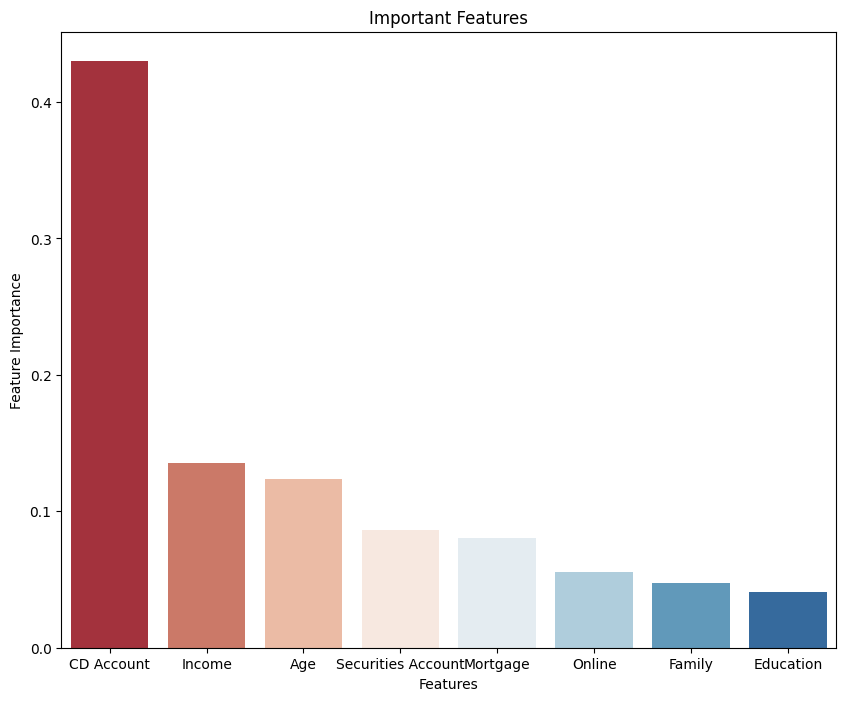

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot( x = important_features.index, y = important_features, palette = "RdBu")

plt.xlabel('Features')
plt.ylabel('Feature Importance')

plt.title("Important Features")
plt.show()

#### BaggingClassifier + DecisionTreeClassifier(with splitter='random') = RandomForestClassifier

In [27]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [29]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(splitter ='random', max_leaf_nodes=12), 
                                                   n_estimators = 400, 
                                                   max_samples = 1.0,
                                                   bootstrap = True,
                                                   n_jobs = -1)

bag_clf.fit(x_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(max_leaf_nodes=12,
                                                   splitter='random'),
                  n_estimators=400, n_jobs=-1)

In [30]:
y_pred = bag_clf.predict(x_test)

accuracy_score(y_test, y_pred)

0.78125

### ExtraTreesClassifier
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html    
Extra-Tree Classifier is growing tree even more random by using random thresholds for each features rather than searching for best possible thresholds(like regular decision tree).

In [31]:
from sklearn.ensemble import ExtraTreesClassifier

In [32]:
extra_clf = ExtraTreesClassifier(n_estimators = 600,
                                 max_leaf_nodes = 16,
                                 n_jobs = -1)

extra_clf.fit(x_train, y_train)

ExtraTreesClassifier(max_leaf_nodes=16, n_estimators=600, n_jobs=-1)

In [33]:
y_pred = extra_clf.predict(x_test)

accuracy_score(y_test, y_pred)

0.7708333333333334

In [46]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

X, y = make_blobs(n_samples=10000, n_features=10, centers=100,
    random_state=0)

clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2,
    random_state=0)
scores = cross_val_score(clf, X, y, cv=5)
scores.mean()


clf = RandomForestClassifier(n_estimators=10, max_depth=None,
    min_samples_split=2, random_state=0)
scores = cross_val_score(clf, X, y, cv=5)
scores.mean()


clf = ExtraTreesClassifier(n_estimators=10, max_depth=None,
    min_samples_split=2, random_state=0)
scores = cross_val_score(clf, X, y, cv=5)
scores.mean() > 0.999

True

**Out of Bag Score in RandomForest**
Bag score or OOB score is the type of validation technique that is mainly used in bagging algorithms to validate the bagging algorithm. Here a small part of the validation data is taken from the mainstream of the data and the predictions on the particular validation data are done and compared with the other results.

The main advantage that the OOB score offers is that here the validation data is not seen by the bagging algorithm and that is why the results on the OOB score are the true results that indicated the actual performance of the bagging algorithm.

To get the OOB score of the particular Random Forest algorithm, one needs to set the value “True” for the OOB_Score parameter in the algorithm. 

In [37]:
from sklearn.ensemble import RandomForestClassifier
RandomForest = RandomForestClassifier(oob_score=True)
RandomForest.fit(x_train, y_train)
print(RandomForest.oob_score_)

0.8177083333333334


#Tuning Parameters:
n_estimators=100, *, 
criterion='gini', 
max_depth=None, 
min_samples_split=2, 
min_samples_leaf=1, 
min_weight_fraction_leaf=0.0, 
max_features='sqrt', 
max_leaf_nodes=None, 
min_impurity_decrease=0.0, 
bootstrap=True, 
oob_score=False, 
n_jobs=None, 
random_state=None, 
verbose=0, 
warm_start=False,
class_weight=None,
ccp_alpha=0.0, 
max_samples=None

In [41]:
import numpy as np
np.arange(10,200,10)

array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190])

In [44]:
hyperparams=dict()
frac=0.1*len(x_train)
hyperparams['n_estimators']=np.arange(10,200,25)
hyperparams['criterion']=['gini', 'entropy', 'log_loss']
hyperparams['min_samples_split']=np.arange(4,10)
hyperparams['min_samples_leaf']=np.arange(1,10)
hyperparams['max_features']=np.arange(1,10)
hyperparams['max_samples']=list(np.arange(1,int(len(x_train)*0.5),20))
hyperparams['max_features']= ['auto', 'sqrt', 'log2']
hyperparams['bootstrap']= [True, False]
hyperparams['max_depth']=[None] + list(np.arange(5, 30, 5))

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_iris
import numpy as np

# Load the iris dataset as an example
iris = load_iris()

# Initialize the random forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Initialize the randomized search CV object
random_search = RandomizedSearchCV(
    rf_classifier, 
    hyperparams, 
    n_iter=1000, 
    cv=5, 
    random_state=42, 
    n_jobs=-1
)

# Perform hyperparameter tuning on the dataset using the random forest classifier
random_search.fit(iris.data, iris.target)

# Print the best parameters found
print('Best parameters:', random_search.best_params_)

# Print the mean cross-validation score of the best estimator
print('Best score:', random_search.best_score_)

C:\Users\iyers\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
3345 fits failed out of a total of 5000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
275 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\iyers\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\iyers\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 403, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "C:\Users\iyers\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 116, in _get_n_samples_bootstrap
    raise ValueError(msg.format(n_sa

Best parameters: {'n_estimators': 160, 'min_samples_split': 8, 'min_samples_leaf': 3, 'max_samples': 41, 'max_features': 'sqrt', 'max_depth': 15, 'criterion': 'entropy', 'bootstrap': True}
Best score: 0.9666666666666668
